# Using merge_asof() to study stocks
You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, **JP Morgan (JPM)**, **Wells Fargo (WFC)**, and **Bank Of America (BAC)**. You want to know how the price change of the two other banks compare to JP Morgan. Therefore, you will need to merge these three logs into one table. Afterward, you will use the `pandas` `.diff()` method to compute the price change over time. Finally, plot the price changes so you can review your analysis.

The three log files have been loaded for you as tables named `jpm`, `wells`, and `bac`

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
path=r'/media/documentos/Cursos/Data Science/Python/Data_Science_Python/data_sets/'

stocks=pd.read_csv(path+'all_stocks_5yr.csv',usecols = ['date','close','Name'],parse_dates=['date'])
stocks.rename(columns = {'date':'date_time'}, inplace = True)
print('gstocks \n',stocks.head(),'\n')

jpm = stocks[['date_time','close']][stocks['Name']=='JPM']
print('jpm \n',jpm.head(),'\n')
wells=stocks[['date_time','close']][stocks['Name']=='WFC']
print('wells \n',wells.head(),'\n')
bac=stocks[['date_time','close']][stocks['Name']=='BAC']
print('bac \n',bac.head(),'\n')

gstocks 
    date_time  close Name
0 2013-02-08  14.75  AAL
1 2013-02-11  14.46  AAL
2 2013-02-12  14.27  AAL
3 2013-02-13  14.66  AAL
4 2013-02-14  13.99  AAL 

jpm 
         date_time  close
319039 2013-02-08  48.63
319040 2013-02-11  48.66
319041 2013-02-12  49.14
319042 2013-02-13  48.68
319043 2013-02-14  49.22 

wells 
         date_time  close
591411 2013-02-08  34.88
591412 2013-02-11  35.26
591413 2013-02-12  35.51
591414 2013-02-13  35.13
591415 2013-02-14  35.21 

bac 
        date_time   close
72870 2013-02-08  11.760
72871 2013-02-11  11.860
72872 2013-02-12  12.245
72873 2013-02-13  12.170
72874 2013-02-14  12.130 



- Use `merge_asof() `to merge `jpm` (left table) and `wells` together on the `date_time` column, where the rows with the **nearest** times are matched, and with `suffixes=('', '_wells')`. Save to `jpm_wells`.
- Use `merge_asof()` to merge `jpm_wells` (left table) and `bac` together on the `date_time` column, where the rows with the closest times are matched, and with `suffixes=('_jpm', '_bac')`. Save to `jpm_wells_bac`.
- Using `price_diffs`, create a line plot of the close price of JPM, WFC, and BAC only.

  date_time  close_jpm  close_wells  close_bac
0       NaT        NaN          NaN        NaN
1    3 days       0.03         0.38      0.100
2    1 days       0.48         0.25      0.385
3    1 days      -0.46        -0.38     -0.075
4    1 days       0.54         0.08     -0.040


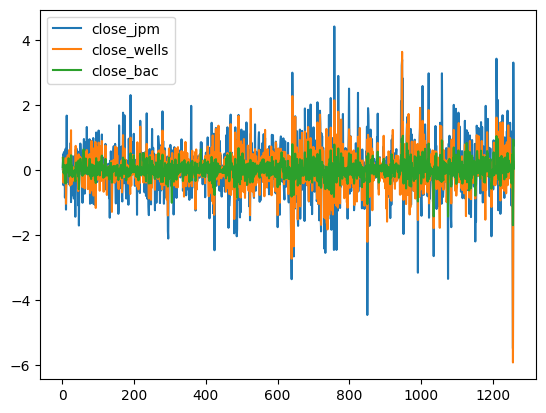

In [14]:
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm,wells,on='date_time',suffixes=('','_wells'),direction='nearest')


# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells,bac,on='date_time',suffixes=('_jpm', '_bac'),direction='nearest')


# Compute price diff
price_diffs = jpm_wells_bac.diff()
print(price_diffs.head())

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm','close_wells', 'close_bac'])
plt.show()